C:\Users\zacha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\spectral\io\envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


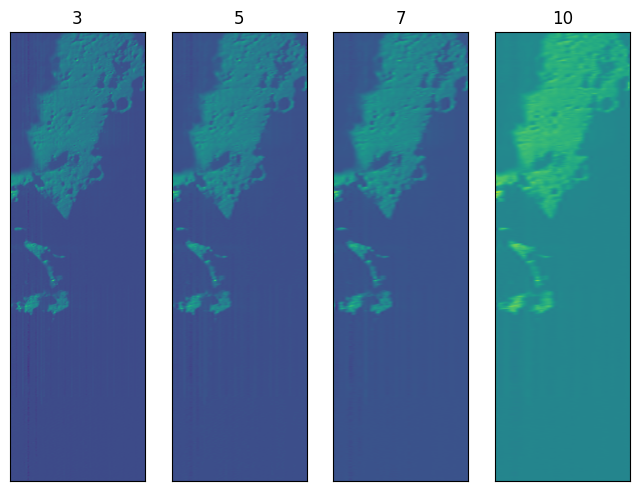

In [9]:
import numpy as np
import os
import pandas as pd
from HySpec_Image_Processing import HDR_Image
from fancy_spec_plot import fancy_spec_plot
import matplotlib.pyplot as plt
from spec_average import spec_avg
from scipy import interpolate as interp
import numpy.random as r
from scipy import signal
import spectral as sp
import tifffile as tf
from fancy_spec_plot import plot_numpy_images
from copy import copy

def destripe(image,box_size,**kwargs):
    defaultKwargs = {"plotImg":False}
    kwargs = {**defaultKwargs,**kwargs}

    destripedImage = np.zeros(image.shape)
    n=0
    for row in range(image.shape[0]):
        xCoords = np.arange(image.shape[1])
        yAvg,std,xAvg = spec_avg(image[row,:,0],xCoords,box_size)
        f = interp.CubicSpline(xAvg,yAvg)
        xtest = np.linspace(0,image.shape[1],304)
        destripedImage[row,:,0] = f(xtest)
        if kwargs.get('plotImg') == True:
            if n<3:
                fig,ax = plt.subplots(1,1)
                ax.plot(xCoords,image[row,:,0])
                ax.plot(xAvg,yAvg)
                ax.plot(xtest,f(xtest))
            else:
                pass
            fig,ax = plt.subplots(1,1)
            ax.imshow(destripedImage[:,:,0])

        n+=1
    
    sharp = np.array(([0,-1,0],[-1,10,-1],[0,-1,0]))
    destripedImage_sharp = signal.convolve2d(destripedImage[:,:,0],sharp)

    return destripedImage_sharp

hdr = sp.envi.open(r'D:\Data/20230209T095534013597/extracted_files/hdr_files/m3g20090417t193320_v01_rfl/m3g20090417t193320_v01_rfl.hdr')
bandCenters = hdr.bands.centers
bandCenters = np.array(bandCenters)

allowedIndices = np.where((bandCenters>900)&(bandCenters<2600))[0]
allowedWvl = bandCenters[allowedIndices]

image = hdr.read_bands(allowedIndices)

im1,im2,im3,im4 = destripe(image,3),destripe(image,5),destripe(image,7),destripe(image,10)

plot_numpy_images(im1,im2,im3,im4,titles=['3','5','7','10'],figtitle='Destriping Images')

In [52]:
import fancy_spec_plot

fancy_spec_plot.plot_numpy_images()

AttributeError: module 'fancy_spec_plot' has no attribute 'plot_numpy_images'

In [11]:
import spectral as sp

def find(s, ch):
    return [i for i, ltr in enumerate(s) if ltr == ch]

hdr = sp.envi.open(r"D:\Data/20230209T095534013597/extracted_files/hdr_files/m3g20090417t193320_v01_rfl/m3g20090417t193320_v01_rfl.hdr")
filename = hdr.filename
print (filename)
dateTimeIndex = find(filename,'t')[-1]
print (hdr.filename[dateTimeIndex+1:dateTimeIndex+7])

D:\Data/20230209T095534013597/extracted_files/hdr_files/m3g20090417t193320_v01_rfl/m3g20090417t193320_v01_rfl.img
193320
